In [1]:
! pip install -U scikit-learn
! pip install matplotlib
! pip install pandas
! pip install numpy
! pip install scikit-plot
! pip install scipy==1.11.4

In [2]:
import pickle
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import seaborn as sns

## Load in Data

### TF-IDF

In [3]:
with open('/Users/shreyanakum/Documents/CS178/CS-178-Project/DATA/tfidf_data.pkl', 'rb') as f:
    tfidf_data = pickle.load(f)

X_train_tfidf = tfidf_data['X_train']
X_test_tfidf = tfidf_data['X_test']
y_train_tfidf = tfidf_data['y_train']
y_test_tfidf = tfidf_data['y_test']
vectorizer_tfidf = tfidf_data['vectorizer']

/Users/shreyanakum/Documents/CS178/CS-178-Project/.venv/lib/python3.12/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.7.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/shreyanakum/Documents/CS178/CS-178-Project/.venv/lib/python3.12/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.7.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [4]:
classes = ['toxic', 'severe_toxic', 'insult', 'threat', 'obscene', 'identity_hate']

### TFIDF only because percepton revealed that is the best one

In [5]:
param_grid = {
    # 'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [10, 15, 20],
    'min_samples_leaf': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
}


dt_base = DecisionTreeClassifier(random_state=42)

In [10]:
grid_search = GridSearchCV(
    estimator=dt_base,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(tfidf_data['X_train'], tfidf_data['y_train'])

print("Best hyperparameters from Grid Search:")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1 score: {grid_search.best_score_}")

best_dt = grid_search.best_estimator_

# cv scores on training data
print('\n')
print("Cross validation scores (5-fold)")
cv_scores = cross_val_score(best_dt, tfidf_data['X_train'], tfidf_data['y_train'], cv=5, scoring='f1_weighted')
print(f"CV F1 Scores: {cv_scores}")
print(f"Mean CV F1 Score: {cv_scores.mean()} (+/- {cv_scores.std() * 2})")

y_pred = best_dt.predict(tfidf_data['X_test'])

test_f1 = f1_score(tfidf_data['y_test'], y_pred, average='weighted')
print("Test set performance")
print(f"Test Set Weighted F1 Score: {test_f1}")

test_accuracy_sc = accuracy_score(tfidf_data['y_test'], y_pred)
print(f"Test Set Accuracy Score: {test_accuracy_sc}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=  12.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=  12.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=  12.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=  12.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=  12.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=  12.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=  12.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=  12.9s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10; total time=  11.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10; total time=  11.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10; total time=  11.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10; total time=  11.1s


In [11]:
print(classification_report(tfidf_data['y_test'], y_pred))

              precision    recall  f1-score   support

           0       0.90      0.50      0.64      3056
           1       0.38      0.14      0.21       321
           2       0.85      0.68      0.75      1715
           3       0.29      0.03      0.05        74
           4       0.72      0.51      0.60      1614
           5       0.52      0.14      0.22       294

   micro avg       0.81      0.51      0.63      7074
   macro avg       0.61      0.33      0.41      7074
weighted avg       0.80      0.51      0.61      7074
 samples avg       0.04      0.04      0.04      7074



/Users/shreyanakum/Documents/CS178/CS-178-Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shreyanakum/Documents/CS178/CS-178-Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shreyanakum/Documents/CS178/CS-178-Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to con


Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31727
           2       0.14      0.02      0.03       101
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        76
           5       0.00      0.00      0.00        10

    accuracy                           0.99     31915
   macro avg       0.23      0.20      0.21     31915
weighted avg       0.99      0.99      0.99     31915


Aggregate Confusion Matrix (Multi-class):
[[31715    12     0     0     0]
 [   99     2     0     0     0]
 [    1     0     0     0     0]
 [   76     0     0     0     0]
 [   10     0     0     0     0]]


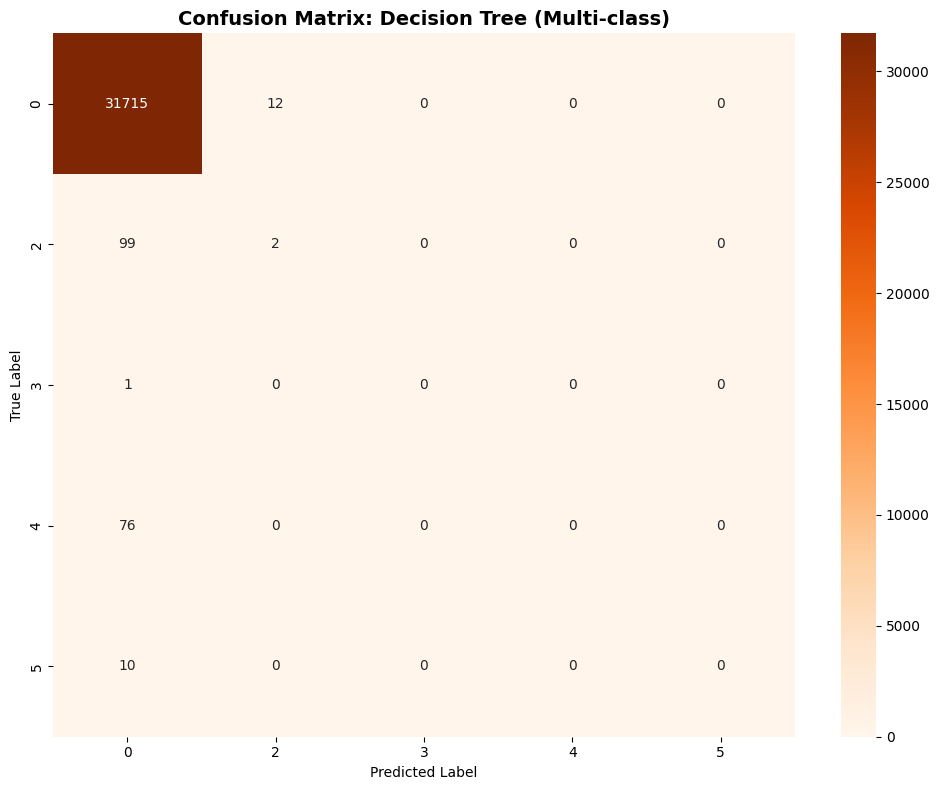

In [ ]:
# Convert multilabel to class indices if needed
y_test = tfidf_data['y_test']
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

# Get predictions (assuming y_pred is already computed)
if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
    y_pred = np.argmax(y_pred, axis=1)

# Get unique classes
classes = np.unique(y_test)

print('\nClassification report:')
print(classification_report(y_test, y_pred, zero_division=0))

# Multi-class confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nAggregate Confusion Matrix (Multi-class):")
print(cm)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix: Decision Tree (Multi-class)', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [ ]:
# make roc curve